In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir("/content/drive/MyDrive/ECE3296/")

In [4]:
!pwd

/content/drive/.shortcut-targets-by-id/1NkxwB7T3f9y673Xsedhr6A9yE3iL8jOI/ECE3296


In [5]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
loaded_model = tf.keras.models.load_model('model_3.h5')
loaded_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 254, 254, 10)      100       
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 127, 127, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 62, 62, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_45 (Conv2D)          (None, 60, 60, 10)        910       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 30, 30, 10)      

In [7]:
DATABASE_DIR = 'Database_png'
image_files = sorted([f for f in os.listdir(DATABASE_DIR) if f.endswith('.png')])
IMG_SIZE = (256, 256)

feature_vectors = []
feature_vectors = tf.nn.softmax(np.load('/content/drive/MyDrive/ECE3296/fv5.npy'))
print(feature_vectors.shape)

(400, 20)


In [10]:
from divp_functions import compute_distance, rank_images_by_similarity, get_img_features

Label(value='Select a query image: ')

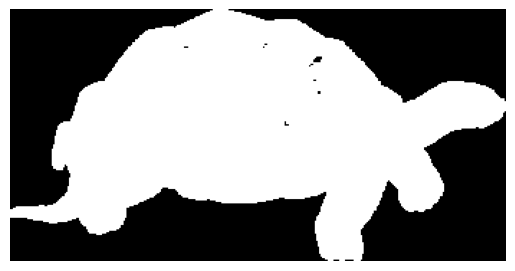

Label(value='Retrieved images: ')

NameError: name 'IMG_SIZE' is not defined

In [11]:
from google.colab import files
import ipywidgets as widgets
from IPython.display import display
import io
import cv2

select_image_label = widgets.Label('Select a query image: ')
display(select_image_label)
uploaded_files = files.upload()


for filename, content in uploaded_files.items():
    with open(filename, 'wb') as f:
        f.write(content)
    print(f'Uploaded file "{filename}" with length {len(content)} bytes.')
image = cv2.imread(filename)
plt.imshow(image)
plt.axis('off')  # Optional: to remove axes for visual clarity
plt.show()

select_image_label = widgets.Label('Retrieved images: ')
display(select_image_label)

fet = get_img_features(filename)
ranked_indices = rank_images_by_similarity(fet, feature_vectors)

N = 30
top_n_indices = ranked_indices[:N]

top_n_images = [image_files[i] for i in top_n_indices]

def display_images(top_n_image_paths):
  for i, file in enumerate(top_n_images):
    image = plt.imread(f"Database_png/{file}")
    plt.subplot(6, 5, i + 1)
    plt.imshow(image, cmap='gray')

display_images(top_n_images)


In [121]:
np.square(np.mean(np.square(feature_vectors[0]) / np.square(feature_vectors[24])))

1.002479

In [85]:
feature_vectors[0]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0.0527217 , 0.04940477, 0.04939562, 0.05153253, 0.04940704,
       0.04940994, 0.04939527, 0.05116349, 0.04998156, 0.04939526,
       0.04947166, 0.04939548, 0.04940546, 0.04939581, 0.04939529,
       0.04940151, 0.05057557, 0.04941075, 0.04939526, 0.05234609],
      dtype=float32)>

In [ ]:
for i, vector in enumerate(feature_vectors):
    # Assuming you are comparing each feature vector to a "ground truth" vector or another feature vector
    # Here I'm just using the next one in the list for the sake of example
    next_vector = feature_vectors[(i + 1) % len(feature_vectors)]

    # Compute the absolute differences for the current pair of vectors
    differences[i] = np.abs(vector - next_vector)

# Now 'differences' contains the absolute differences for each class across all pairs of feature vectors
# To find which class has the smallest differences on average:
average_differences = np.mean(differences, axis=0)
smallest_difference_class = np.argmin(average_differences)

In [148]:
def compute_distance(vec1, vec2):
    # Find the indices of the maximum values
    index1 = np.argmax(vec1)
    index2 = np.argmax(vec2)

    # If the indices are the same, calculate the difference
    if index1 == index2:
        return np.linalg.norm(vec1 - vec2)
    else:
        return np.linalg.norm(np.sqrt(np.abs(vec1 - vec2)))  # or return some other value to indicate that the indices are not the same

In [139]:
np.square(feature_vectors[0] - [feature_vectors[1]])

array([[4.02012823e-08, 6.38103792e-09, 6.60587460e-08, 1.52894799e-07,
        7.31768523e-07, 6.86543267e-09, 5.24406518e-09, 1.10232484e-07,
        4.06422373e-07, 5.11057996e-09, 2.21390053e-08, 4.69744244e-09,
        6.58137056e-09, 4.67754857e-09, 5.11590770e-09, 6.57580586e-06,
        1.56821125e-06, 5.83214010e-09, 5.24244648e-09, 9.16601905e-10]],
      dtype=float32)

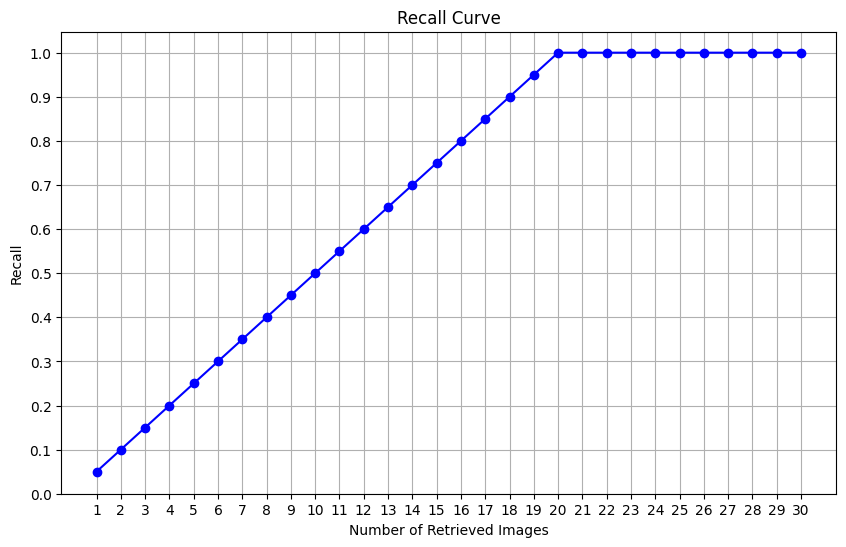

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Let's assume we have 30 retrieved images, with the first 20 being relevant and the next 10 being guesses.
# We create a list that contains 1s for relevant images and 0s for guesses.
retrieved_images = [1] * 20 + [0] * 10  # 1 represents relevant, 0 represents irrelevant

# We will calculate the recall after each image retrieval
def calculate_recall(retrieved_list, relevant_count):
    # Calculate cumulative sum to get the number of relevant images retrieved up to each point
    cumulative_relevant = np.cumsum(retrieved_list)

    # Recall is the cumulative count of relevant images divided by the total number of relevant images
    recall_points = cumulative_relevant / relevant_count
    return recall_points

# The total number of relevant images in the dataset is 20 (as per the given info)
total_relevant = 20
recalls = calculate_recall(retrieved_images, total_relevant)

# Plotting the recall curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), recalls, marker='o', linestyle='-', color='blue')
plt.title('Recall Curve')
plt.xlabel('Number of Retrieved Images')
plt.ylabel('Recall')
plt.grid(True)
plt.xticks(range(1, 31))  # Set x-ticks to be every image
plt.yticks(np.linspace(0, 1, 11))  # Set y-ticks to be from 0 to 1
plt.show()


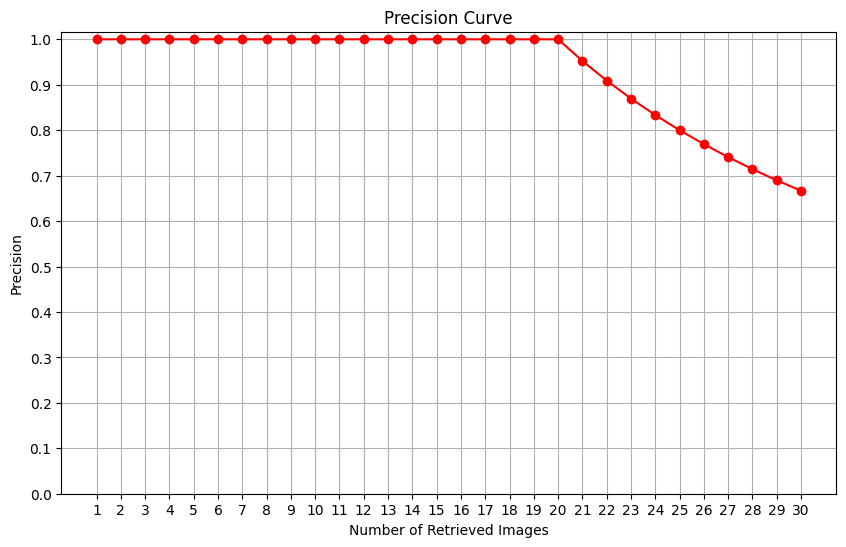

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# We have the same setup: 20 relevant images followed by 10 irrelevant guesses
retrieved_images = [1] * 20 + [0] * 10  # 1 represents relevant, 0 represents irrelevant

# We will calculate the precision after each image retrieval
def calculate_precision(retrieved_list):
    # Calculate cumulative sum to get the number of relevant images retrieved up to each point
    cumulative_relevant = np.cumsum(retrieved_list)
    # Precision is the cumulative count of relevant images divided by the number of retrieved images at each point
    precision_points = cumulative_relevant / np.arange(1, len(retrieved_list) + 1)
    return precision_points

precisions = calculate_precision(retrieved_images)

# Plotting the precision curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), precisions, marker='o', linestyle='-', color='red')
plt.title('Precision Curve')
plt.xlabel('Number of Retrieved Images')
plt.ylabel('Precision')
plt.grid(True)
plt.xticks(range(1, 31))  # Set x-ticks to be every image
plt.yticks(np.linspace(0, 1, 11))  # Set y-ticks to be from 0 to 1
plt.show()


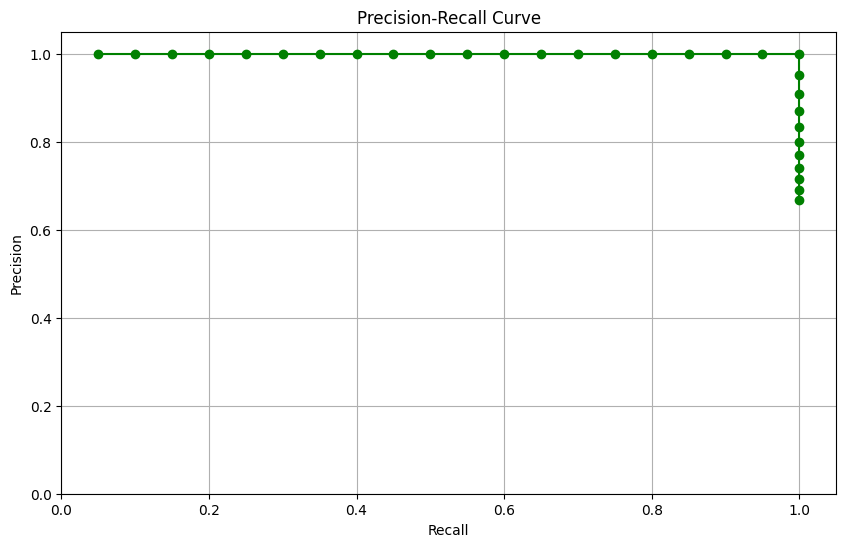

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# We have the same setup: 20 relevant images followed by 10 irrelevant guesses
retrieved_images = [1] * 20 + [0] * 10  # 1 represents relevant, 0 represents irrelevant

# We will calculate the precision and recall after each image retrieval
def calculate_precision_recall(retrieved_list):
    cumulative_relevant = np.cumsum(retrieved_list)
    precision_points = cumulative_relevant / np.arange(1, len(retrieved_list) + 1)
    recall_points = cumulative_relevant / cumulative_relevant[-1]
    return precision_points, recall_points

precisions, recalls = calculate_precision_recall(retrieved_images)

# Plotting the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, marker='o', linestyle='-', color='green')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.xlim(0, 1.05)  # Extend x-axis a bit to ensure the last point is visible
plt.ylim(0, 1.05)  # Extend y-axis a bit for visibility as well
plt.show()
